Decision trees involve the greedy selection of the best split point from the dataset at each step.

This algorithm makes decision trees susceptible to high variance if they are not pruned. This high variance can be harnessed and reduced by creating multiple trees with different samples of the training dataset (different views of the problem) and combining their predictions. This approach is called bootstrap aggregation or bagging for short.

A limitation of bagging is that the same greedy algorithm is used to create each tree, meaning that it is likely that the same or very similar split points will be chosen in each tree making the different trees very similar (trees will be correlated). This, in turn, makes their predictions similar, mitigating the variance originally sought.

We can force the decision trees to be different by limiting the features (rows) that the greedy algorithm can evaluate at each split point when creating the tree. This is called the Random Forest algorithm.

Like bagging, multiple samples of the training dataset are taken and a different tree trained on each. The difference is that at each point a split is made in the data and added to the tree, only a fixed subset of attributes can be considered.

Sonar dataset describes sonar chirp returns bouncing off different surfaces. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders. There are 208 observations.

It is a well-understood dataset. All of the variables are continuous and generally in the range of 0 to 1. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 1 and 0.

In a decision tree, split points are chosen by finding the attribute and the value of that attribute that results in the lowest cost.

For classification problems, this cost function is often the Gini index, that calculates the purity of the groups of data created by the split point. A Gini index of 0 is perfect purity where class values are perfectly separated into two groups, in the case of a two-class classification problem.

Finding the best split point in a decision tree involves evaluating the cost of each value in the training dataset for each input variable.

For bagging and random forest, this procedure is executed upon a sample of the training dataset, made with replacement. Sampling with replacement means that the same row may be chosen and added to the sample more than once.

We can update this procedure for Random Forest. Instead of enumerating all values for input attributes in search if the split with the lowest cost, we can create a sample of the input attributes to consider.

This sample of input attributes can be chosen randomly and without replacement, meaning that each input attribute needs only be considered once when looking for the split point with the lowest cost.

Random Forest is one of the most popular and most powerful machine learning algorithms. It is
a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.

The bootstrap is a powerful statistical method for estimating a quantity from a
data sample. This is easiest to understand if the quantity is a descriptive statistic such as a
mean or a standard deviation. Let’s assume we have a sample of 100 values (x) and we’d like to
get an estimate of the mean of the sample. We can calculate the mean directly from the sample
as:

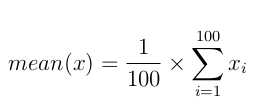

We know that our sample is small and that our mean has error in it. We can improve the
estimate of our mean using the bootstrap procedure:
1. Create many (e.g. 1000) random sub-samples of our dataset with replacement (meaning we can select the same value multiple times).
2. Calculate the mean of each sub-sample.
3. Calculate the average of all of our collected means and use that as our estimated mean for the data.


For example, let’s say we used 3 resamples and got the mean values 2.3, 4.5 and 3.3. Taking
the average of these we could take the estimated mean of the data to be 3.367. This process
can be used to estimate other quantities like the standard deviation and even quantities used in
machine learning algorithms, like learned coefficients.

Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method.
An ensemble method is a technique that combines the predictions from multiple machine learning
algorithms together to make more accurate predictions than any individual model. Bootstrap
Aggregation is a general procedure that can be used to reduce the variance for those algorithms
that have high variance. An algorithm that has high variance are decision trees, like classification
and regression trees (CART).

Decision trees are sensitive to the specific data on which they are trained. If the training
data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision
tree can be quite different and in turn the predictions can be quite different. Bagging is the
application of the Bootstrap procedure to a high-variance machine learning algorithm, typically
decision trees. Let’s assume we have a dataset of 1000 instances and we are using the CART
algorithm. Bagging of the CART algorithm would work as follows.

1. Create many (e.g. 100) random sub-samples of our dataset with replacement.
2. Train a CART model on each sample.
3. Given a new dataset, calculate the average prediction from each model.

For example, if we had 5 bagged decision trees that made the following class predictions
for an input instance: blue, blue, red, blue and red, we would take the most frequent class
and predict blue. When bagging with decision trees, we are less concerned about individual
trees overfitting the training data. For this reason and for efficiency, the individual decision
trees are grown deep (e.g. few training samples at each leaf-node of the tree) and the trees
are not pruned. These trees will have both high variance and low bias. These are important
characteristics of sub-models when combining predictions using bagging.
The only parameters when bagging decision trees is the number of trees to create. This
can be chosen by increasing the number of trees on run after run until the accuracy begins to
stop showing improvement (e.g. on a cross validation test harness). Creating large numbers of
decision trees may take a long time, but will not overfit the training data. Just like the decision
trees themselves, Bagging can be used for classification and regression problems.


Random Forests are an improvement over bagged decision trees. A problem with decision
trees like CART is that they are greedy. They choose which variable to split on using a
greedy algorithm that minimizes error. As such, even with Bagging, the decision trees can
have a lot of structural similarities and in turn result in high correlation in their predictions.
Combining predictions from multiple models in ensembles works better if the predictions from
the sub-models are uncorrelated or at best weakly correlated.
Random forest changes the algorithm for the way that the sub-trees are learned so that
the resulting predictions from all of the subtrees have less correlation. It is a simple tweak.
In CART, when selecting a split point, the learning algorithm is allowed to look through all
variables and all variable values in order to select the most optimal split-point. The random
forest algorithm changes this procedure so that the learning algorithm is limited to a random
sample of features of which to search. The number of features that can be searched at each split
point (m) must be specified as a parameter to the algorithm. You can try different values and
tune it using cross validation.

* For classification a good default is: m = sqrt(p)
* For regression a good default is: m = p/3

Where m is the number of randomly selected features that can be searched at a split point
and p is the number of input variables. For example, if a dataset had 25 input variables for a
classification problem, then: m = 5

For each bootstrap sample taken from the training data, there will be samples left behind that
were not included. These samples are called Out-Of-Bag samples or OOB. The performance
of each model on its left out samples when averaged can provide an estimated accuracy of
the bagged models. This estimated performance is often called the OOB estimate. These
performance measures are a reliable estimate of test error and correlate well with cross validation
estimates of error.

As the Bagged decision trees are constructed, we can calculate how much the error function
drops for a variable at each split point. In regression problems this may be the drop in sum
squared error and in classification this might be the Gini score. These drops in error can be
averaged across all decision trees and output to provide an estimate of the importance of each
input variable. The greater the drop when the variable was chosen, the greater the importance.
These outputs can help identify subsets of input variables that may be most or least relevant
to the problem and suggest at possible feature selection experiments you could perform where
some features are removed from the dataset.

In [2]:
# Random Forest Algorithm on Sonar Dataset frm scratch
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [3]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [4]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

In [5]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [6]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [7]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [8]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [9]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [10]:
# Select the best split point for a dataset
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}


In [11]:
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)


In [12]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)


In [13]:
# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root


In [14]:
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


In [15]:
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample


In [16]:
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

In [17]:
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

In [21]:

# Test the random forest algorithm
seed(2)
# load and prepare data
filename = 'sonar.all-data'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(0, len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

# print(dataset)

# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
for n_trees in [1, 5, 10]:
    scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Trees: 1
Scores: [56.09756097560976, 63.41463414634146, 60.97560975609756, 58.536585365853654, 73.17073170731707]
Mean Accuracy: 62.439%
Trees: 5
Scores: [70.73170731707317, 58.536585365853654, 85.36585365853658, 75.60975609756098, 63.41463414634146]
Mean Accuracy: 70.732%
Trees: 10
Scores: [82.92682926829268, 75.60975609756098, 97.5609756097561, 80.48780487804879, 68.29268292682927]
Mean Accuracy: 80.976%


In [2]:
import pandas as pd
input_data = pd.read_csv('sonar.all-data.csv', header=None)
input_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
input_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


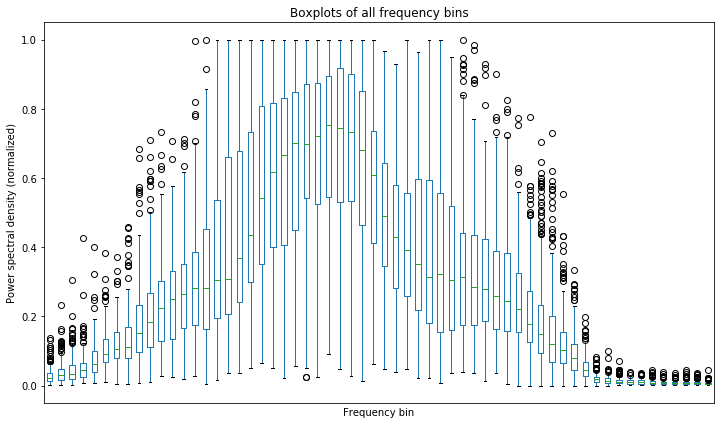

In [6]:
import matplotlib.pyplot as plt

input_data.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()


In [6]:
# Our classes are more or less evenly distributed:

In [7]:
input_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

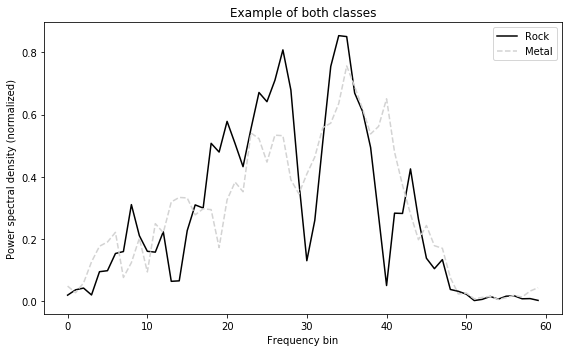

In [8]:
plt.figure(figsize=(8,5))
plt.plot(input_data[input_data[60] == 'R'].values[0][:-1], label='Rock', color='black')
plt.plot(input_data[input_data[60] == 'M'].values[0][:-1], label='Metal', color='lightgray', linestyle='--')
plt.legend()
plt.title('Example of both classes')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.tight_layout()
plt.show()


The dataset is normalized already. Therefore, the only preprocessing we have to do is to encode the classes of type string to integers and split our data into training and testing data. Using 20 % of the data for testing leaves us with 166 samples for training (and validation) as well as 42 samples for final evaluation.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = input_data[60].copy()
y = LabelEncoder().fit_transform(y)

X_df = input_data.copy()
X_df.drop(60, inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df.values, y, test_size=0.2, shuffle=True, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=5,random_state=0)

In [17]:
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
print(clf.feature_importances_)

[0.01323164 0.00679797 0.01027621 0.02370385 0.01541861 0.01077533
 0.0078289  0.01021938 0.04077152 0.03902815 0.07683514 0.07409635
 0.01723119 0.01106646 0.01485779 0.01863318 0.01968373 0.01221602
 0.01037044 0.01617598 0.0156243  0.01191209 0.01293591 0.00826026
 0.00955595 0.01064972 0.01644674 0.02083375 0.01000777 0.00679884
 0.01170174 0.00872681 0.00738392 0.00794632 0.0153152  0.02247064
 0.0195657  0.00666854 0.01096415 0.00983102 0.00681834 0.00979768
 0.02466482 0.01868939 0.02137532 0.01908575 0.02175335 0.03160565
 0.03081105 0.00935402 0.02162231 0.01767997 0.01008079 0.01550652
 0.0104534  0.00496728 0.00763589 0.00835297 0.01052495 0.00640334]


In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[21  5]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.74      0.88      0.80        16

    accuracy                           0.83        42
   macro avg       0.82      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42

0.8333333333333334
